In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 10

In [3]:
# Load dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 16334 files belonging to 11 classes.


In [4]:
# Define class names
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Miner',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [5]:
len(dataset)

511

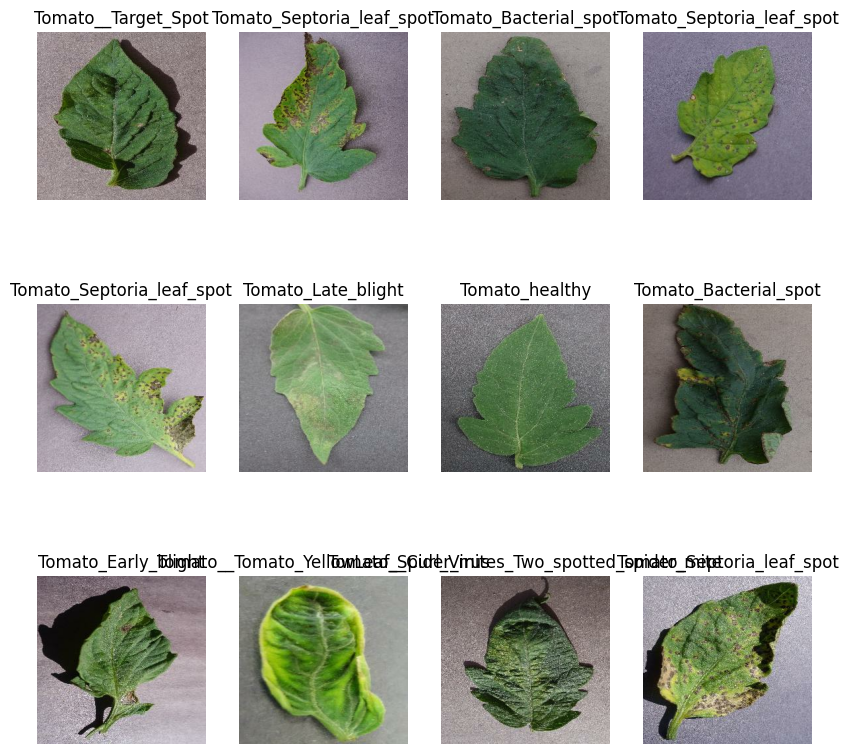

In [6]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [7]:
# Split dataset into training, validation, and test sets
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_ds = dataset.take(train_size)
val_ds = dataset.skip(train_size).take(val_size)
test_ds = dataset.skip(train_size + val_size)

In [8]:
len(train_ds)

408

In [9]:
len(val_ds)

51

In [10]:
len(test_ds)

52

In [11]:
# Define data augmentation layers
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [12]:
# Preprocess and augment training dataset
train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y)).prefetch(buffer_size=tf.data.AUTOTUNE)


In [13]:
# Define input shape
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_names)

In [14]:
# Defining and compiling the model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.compat.v1.losses.sparse_softmax_cross_entropy,
    metrics=['accuracy']
)

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)      

In [16]:
# Training the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

Epoch 1/10


408/408 [==============================] - 280s 684ms/step - loss: 2.1889 - accuracy: 0.3518 - val_loss: 2.1656 - val_accuracy: 0.3750
Epoch 2/10
408/408 [==============================] - 271s 664ms/step - loss: 2.1609 - accuracy: 0.3797 - val_loss: 2.1531 - val_accuracy: 0.3885
Epoch 3/10
408/408 [==============================] - 270s 660ms/step - loss: 2.1537 - accuracy: 0.3862 - val_loss: 2.1595 - val_accuracy: 0.3817
Epoch 4/10
408/408 [==============================] - 272s 667ms/step - loss: 2.1459 - accuracy: 0.3943 - val_loss: 2.1425 - val_accuracy: 0.4001
Epoch 5/10
408/408 [==============================] - 273s 667ms/step - loss: 2.1388 - accuracy: 0.4030 - val_loss: 2.4266 - val_accuracy: 0.1164
Epoch 6/10
408/408 [==============================] - 270s 660ms/step - loss: 2.4272 - accuracy: 0.1158 - val_loss: 2.4211 - val_accuracy: 0.1219
Epoch 7/10
408/408 [==============================] - 273s 668ms/step - loss: 2.4275 - accuracy: 0.1155 - val_loss: 2.4193

In [17]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_ds)
print("Test accuracy:", test_acc)

52/52 [==============================] - 14s 147ms/step - loss: 2.4173 - accuracy: 0.1258
Test accuracy: 0.12575942277908325


In [18]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 408}

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
type(history.history['loss'])

list

In [21]:
len(history.history['loss'])

10

In [22]:
history.history['loss'][:5] # show loss for first 5 epochs

[2.1889095306396484,
 2.1608526706695557,
 2.1536972522735596,
 2.1458582878112793,
 2.1387696266174316]

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

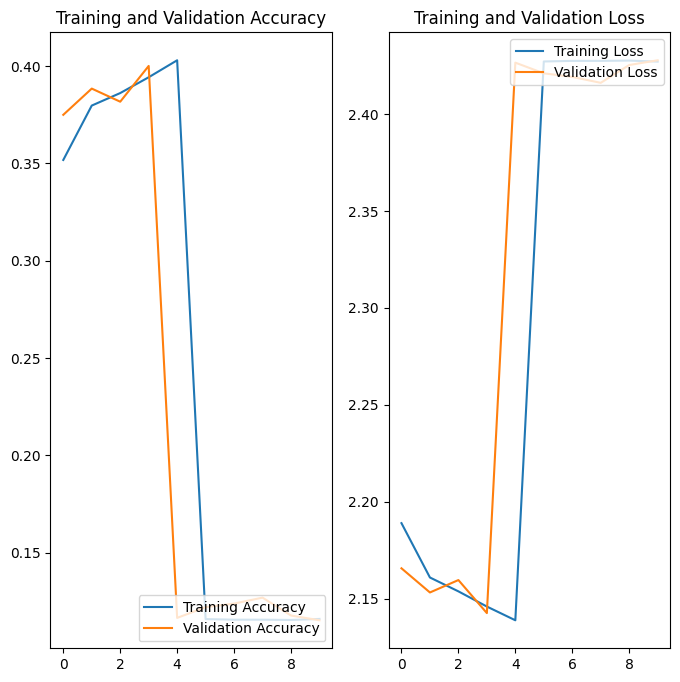

In [24]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Tomato_Bacterial_spot
1/1 [==============================] - 0s 240ms/step
predicted label: Tomato_Late_blight


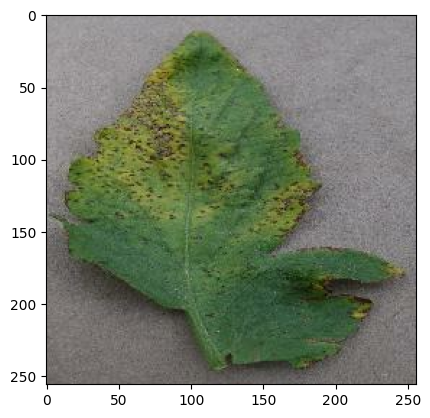

In [25]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [26]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence #Write a function for inference

1/1 [==============================] - 0s 26ms/step


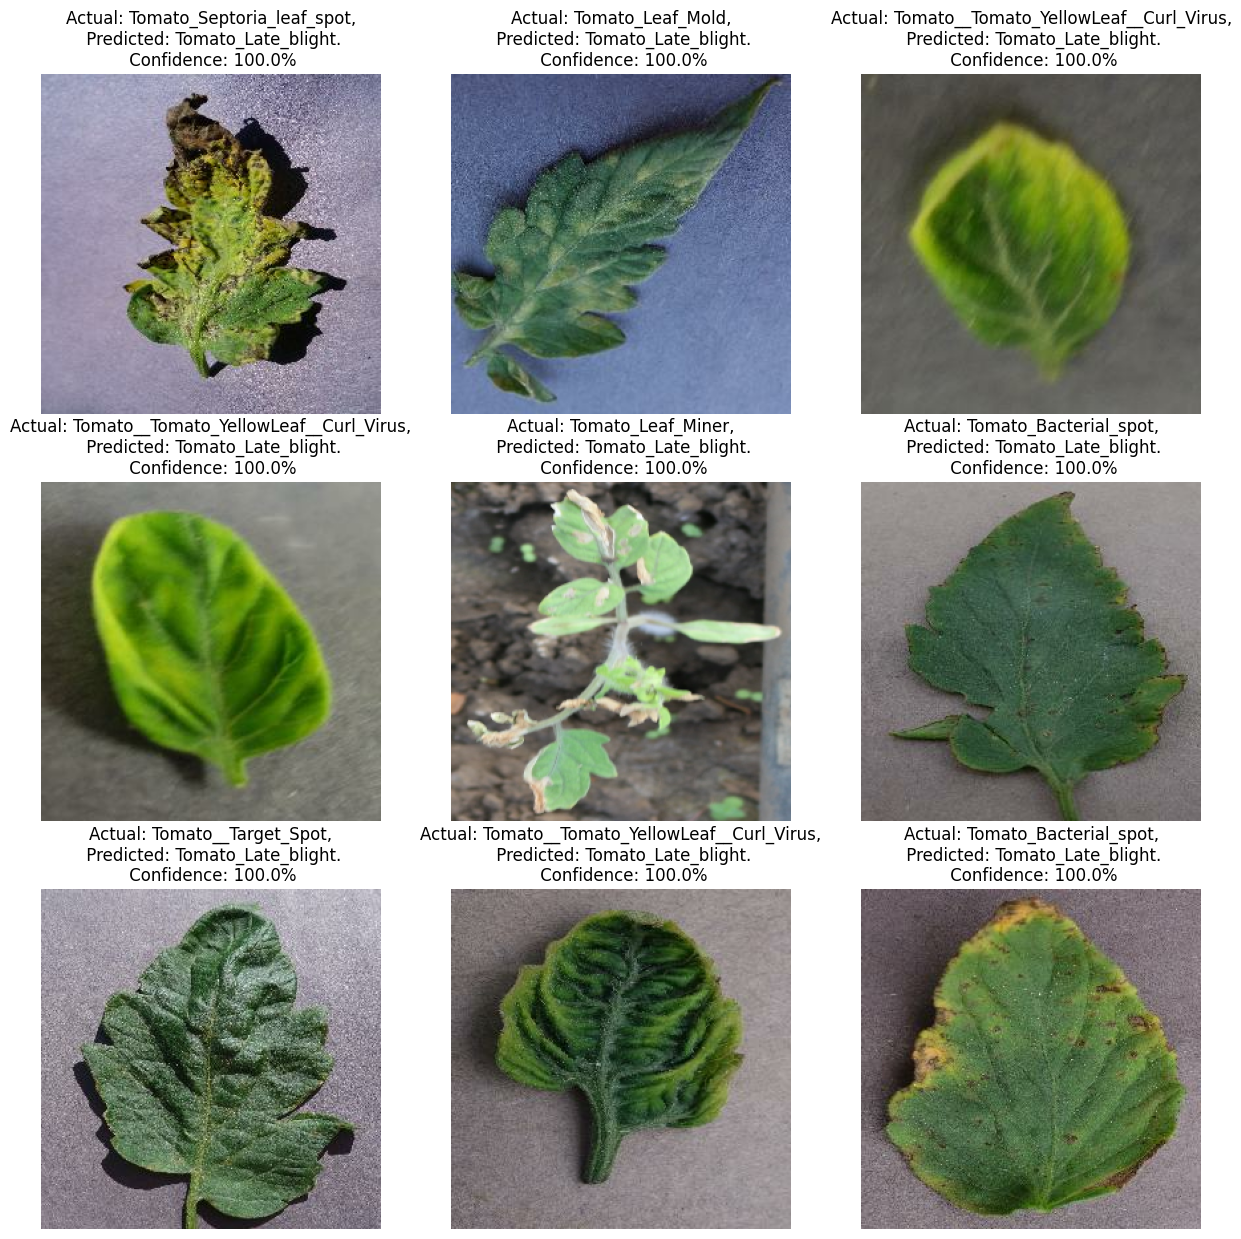

In [27]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [28]:
import os
model_version=max([int(i) for i in os.listdir("../Saved_Models") + [0]])+1
model.save(f"../Saved_Models/{model_version}")

INFO:tensorflow:Assets written to: ../Saved_Models/5\assets


INFO:tensorflow:Assets written to: ../Saved_Models/5\assets
